<a href="https://colab.research.google.com/github/dsrojo10/PDS_UdeA/blob/main/Clase2_06_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase #2 06-Feb-23
### David Santiago Rojo C.

## Ejemplo monitor (GitHub)

### Ejemplo 1. Como simular ruido blanco a una señal analógica.

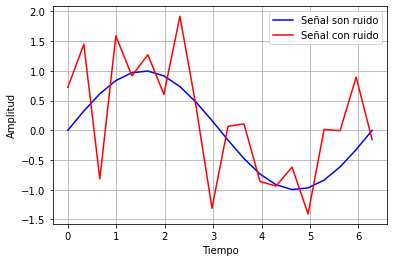

In [ ]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi, 20)     # Vector de tiempo
signal = np.sin(t)                  # Señal
noise = np.random.randn(20)         # ruido blanco
signal_with_noise = signal + noise  # Se añade el ruido a la señal

# Grafica de las señales con y sin ruido
plt.figure()
plt.plot(t, signal, 'b', label = 'Señal son ruido')
plt.plot(t, signal_with_noise, 'r', label = 'Señal con ruido')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

### Ejemplo 2. Criterio de Nyquist para la frecuencia de muestreo.

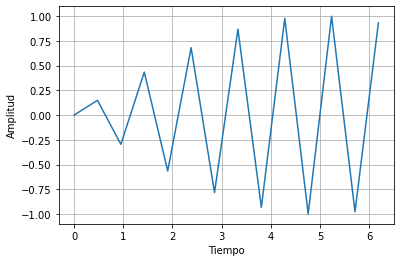

In [ ]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

fmax = 1                            # Frecuencia maxima
w = 2*np.pi*fmax                    # Frecuencia en radianes
fs = 2.1*fmax                       # Frecuencia de muestro
t = np.arange(0, 2*np.pi, 1/fs)     # Vector de tiempo
signal = np.sin(w*t)                # Señal senoidal

# Grafica de la señal analógica
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Aunque la señalno se muestra como se desea, se puede reconstruir la señal ya que cumple el criteo de Nyquist. Veamos que pasa si se aumenta la frecuencia de muestreo a 10 veces la frecuencia máxima.

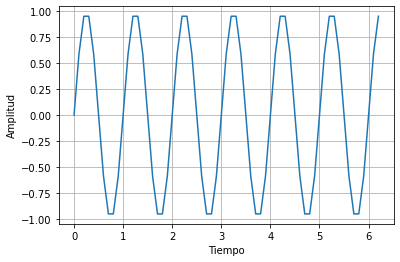

In [ ]:
fs = 10*fmax                        # Frecuencia de muestro aumentada
t = np.arange(0, 2*np.pi, 1/fs)     # nuevo vector de tiempo
signal = np.sin(w*t)                # Nueva señal senoidal

# Grafica de la con fs=10*fmax
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Ya se puede notar la forma senoidal correctamente, si se aumenta mas la frecuencia de muestreo la grafica se va a observar mejor. Para no elevar demasiado el coste computacional es recomendado no elevar mucho este valor.

Veamos que pasa si muestreamos por debajo de la taza de Nyquist:

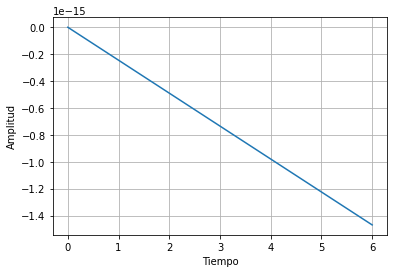

In [ ]:
fs = fmax                           # Frecuencia de muestro aumentada
t = np.arange(0, 2*np.pi, 1/fs)     # nuevo vector de tiempo
signal = np.sin(w*t)                # Nueva señal senoidal

# Grafica de la con fs=fmax
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Ya no hay forma senoidal, por ende, no es posible recuperar la señal posteriormente.

### Ejemplo 3. Muestro de una combinación de señales analógicas.

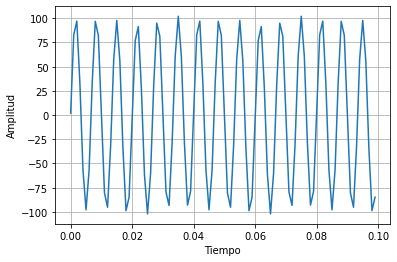

In [ ]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

f1 = 25     # Frecuencia de la señal 1
f2 = 150    # Frecuencia de la señal 2
f3 = 50     # Frecuencia de la señal 3
fs = 1e3    # Frecuencia de muestreo
t = np.arange(0, 0.1, 1/fs) # Vector de tiempo
signal = (3*np.cos(2*np.pi*f1*t)) + (100*np.sin(2*np.pi*f2*t)) - (np.cos(2*np.pi*f3*t)) # Sumade señales

# Grafica de la señal analógica
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

La señal anterior esta muestreada correctamente porque se usó una frecuencia de muestro superior a 2 veces la máxima que es 150, o sea, mayor a 300Hz. Si se usa por ejemplo una frecuencia de muestreo de 100Hz, que es inferior a 300Hz que es la tasa de Nyquist mínima en este caso, la señal estaría mal muestreada como se muestra a continuación.

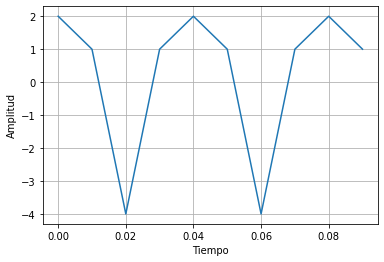

In [ ]:
fs = 1e2    # Frecuencia de muestreo nueva
t = np.arange(0, 0.1, 1/fs) # Vector de tiempo
signal = (3*np.cos(2*np.pi*f1*t)) + (100*np.sin(2*np.pi*f2*t)) - (np.cos(2*np.pi*f3*t)) # Suma de señales

# Grafica de la señal analógica
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

## Ejemplo mio:

### Agregarle ruido blanco a una señal de audio.

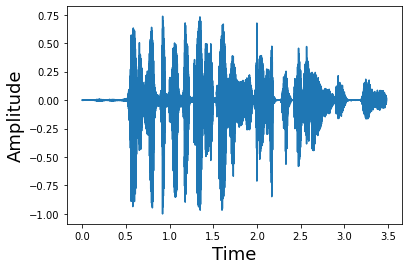

In [ ]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
import numpy as np

file_audio=('senal.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
x=x/float(max(abs(x))) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo
plt.plot(t,x) # Dibujar la grafica

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica
Audio(x, rate=fs) # para escuchar la senal, si se desea

Le agregamos ruido a la señal:

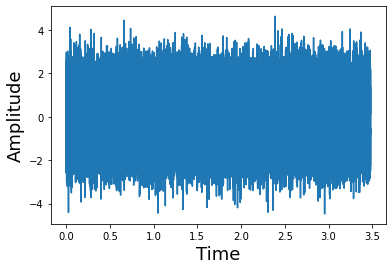

In [ ]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
import numpy as np

file_audio=('senal.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
x=x/float(max(abs(x))) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo

# Generar la señal de ruido
ruido = np.random.normal(0, 1, len(x))

# Sumar la señal de ruido a la señal original
x_ruido = x + ruido

# Graficar y escuchar la señal con ruido
plt.plot(t,x_ruido)
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show()
Audio(x_ruido, rate=fs)
